In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(color_codes=True)
from pandsim import *

## Single-core processing
The following specified the basic properties of the simulation. The most important properties about the disease are:
- The infectious parameters
`inf_spec`=[$r_{\rm inf}, t_{\rm avg},t_{\rm std}$]
- The recovery parameters
`recov_spec`=[$ t_{\rm avg},t_{\rm std}$]
- The death parameters
`dead_spec`=[$ t_{\rm avg},t_{\rm std}$]

Note the $r_{\rm inf}$ is the radii of the infectious zone. Only when subject enters this zone will trigger the program to sample the condition that if the subject will be infected. The unit is meter.
Others like $t_{\rm avg}$ and $t_{\rm std}$ are the average time and standard deviation of reaching that condition. The unit is hour.

In [2]:
# Specified basic parameters
# number of ill in the beginning
n_ill = 1
# number of health in the beginning
n_health = 999
# specified the parameters for infection, recovery and death
inf_spec = [3,0.25,0.5]
recov_spec = [35*24,10*24]
dead_spec = [40*24,10*24]
# Size of the box, meters
box_size = [[-600,600],[-600,600]]
# Initial positions of the subjects, meters
prange = [[-600,600],[-600,600]]
# Initial velocity of the subjects, meters/hour
vrange = [5,30]
# the protectability of wearing mask, it should be positive and larger than o1
mask = None
# size of the time step, the smaller the better resolution in time but also more time consuming
dt = 0.1
# How many days to be simulated. Just change the days instead of steps for convenience
days = 30
steps = int(days*24*(1/dt))
# Should it save the data after running the simulation
save_data = True
# Should the programe adjust the dt size to resolve the enough time resolution when the user-input is too corase-grained?
self_adaptive = False
# Output summary plot dpi
dpi = 150
# Name of the disease. U stands unknown
disease_name = 'C-Flu-2019'

In the above, I set `save_data=True`, which when the simulation is over, it will automatically save the simulated data into a folder named `disease_name` in the same location as this notebook. After running this simulation, it will also displays the corresponding time evolving statistics.

Simulation with total 7200 steps completed in 65.911 seconds
Data and summary plot are saved.
Summary plot saved.


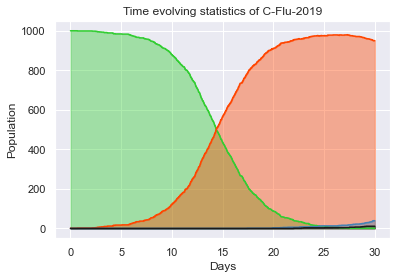

In [3]:
# Running the simulation according to the above specified properties
_ = PandemicSimulation(n_ill = n_ill,n_health = n_health,steps = steps, dt = dt,
                       inf_spec = inf_spec,recov_spec = recov_spec,dead_spec = dead_spec,
                       mask_protect = mask, self_adaptive = self_adaptive, save_data = save_data,
                       disease_name = disease_name, box_size = box_size,
                       prange = prange, vrange = vrange,dpi=dpi)

In [4]:
# Load simulated data if you want to do something with it
# If not, you can ignore this function
summary,fullout = loadsim(disease_name)

If you want to draw the simulated data, you can use the following function. After running, it will also generate a log file `imginfo.txt`. Please do not delete it if you want to continue making a vide out of these figures. 

In [5]:
# Plot the simulated data in each step (dt) into a PNG figure
# to avoid plotting too many figures, one can ask the program to skip some of the steps by using skip
# How many steps should be skipped between two plots. If it is None then no step will be skipped
skip = 100
drawsim(disease_name,skip=skip,dpi=dpi)

Drawing process has completed in 25.3 seconds.
Log file imginfo.txt saved!


When the `disease_name` is given, it will search the folder that stores the images plotted by `drawsim` via the log file `imginfo.txt`. 

In [6]:
# Make all the output figures into a single video, mp4 format
# This function requires python OpenCV, cv2
# If there are more than a thousand figures, it could take minutes to generate the video
# The fps of the video
fps = 10
mkvideo(disease_name,fps=fps)

### Multiprocessing support for figure drawing

The figure drawing function `drawsim` also has a multiprocessing counterpart called `drawsim_mp`. It's still experimental and is not imported automatically by default. You can use the following to import this. It is easily seen that by turning on the multip-core support, depending on the numbers of core available, the speed increases linearly.

In [7]:
# load multiprocessing drawsim_mp
from drawsim_mp import drawsim_mp

In [8]:
# Experimental multiprocessing draw, it can significantly accelerate the drawing speed
# If you encounter problems, please turn off this function and let me know the issue
cores = 4
skip = 100
drawsim_mp('C-Flu-2019',skip=skip,dpi=dpi,cores=cores)

Drawing process has completed in 7.97 seconds..
Log file imginfo.txt saved!
